In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load, merge, normalization vector of parameters.

In [4]:
# Loading each csv file
df1 = pd.read_csv('Time_Female_1part.csv')
df2 = pd.read_csv('Time_Female_2part.csv')

Concatenating all four DataFrames into one.

In [5]:
allpatients = pd.concat([df1,df2])
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,18760.0,-11958.0,5294.547930,0.317484,0.894478,Chory
1,7822.0,-9809.0,3423.929549,-0.643199,-0.277961,Chory
2,8645.0,-12309.0,3791.464376,-0.876762,-0.070322,Chory
3,7948.0,-13705.0,3430.957024,-0.716686,-0.419052,Chory
4,19539.0,-17650.0,4096.550818,0.617535,0.500717,Chory


Features has diffrent rows, so they have to be normalized.

In [6]:
features = allpatients.drop(labels='Status', axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,0.392833,0.650963,-0.147024,0.270322,1.307170,Chory
1,-1.637035,0.990899,-1.229182,-0.782410,-1.406034,Chory
2,-1.484303,0.595441,-1.016562,-1.038352,-0.925525,Chory
3,-1.613652,0.374617,-1.225117,-0.862938,-1.732540,Chory
4,0.537400,-0.249415,-0.840069,0.599122,0.395947,Chory


Afterwards data have to be suffled, in order to avoid overfitting

In [7]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Status
0,1.102303,-1.106135,-0.302168,1.737888,-0.219818,Chory
1,0.346253,-0.187565,0.131097,-0.023764,0.492421,Chory
2,0.458899,0.050342,0.613024,-0.268647,0.072082,Chory
3,-0.061837,0.740811,-0.115124,-0.315200,1.197626,Zdrowy
4,-0.284532,-0.188198,-0.000841,-0.770511,-1.207674,Zdrowy


# PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [10]:
from mpl_toolkits.mplot3d import Axes3D

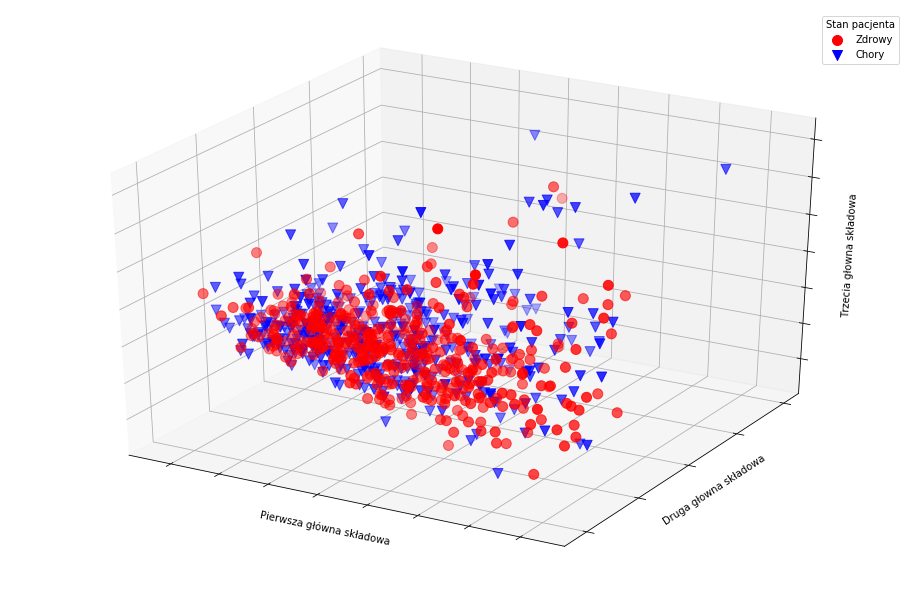

In [11]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, title = 'Stan pacjenta')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa')
ax.set_ylabel('Druga głowna składowa')
ax.set_zlabel('Trzecia głowna składowa')
plt.show()

# Dummy variables

We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [12]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [13]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [14]:
allpatients['Chory'] = status
allpatients.head()

,MAX,MIN,RMS,KURTOSIS,SKEWNESS,Chory
0,1.102303,-1.106135,-0.302168,1.737888,-0.219818,0
1,0.346253,-0.187565,0.131097,-0.023764,0.492421,0
2,0.458899,0.050342,0.613024,-0.268647,0.072082,0
3,-0.061837,0.740811,-0.115124,-0.315200,1.197626,1
4,-0.284532,-0.188198,-0.000841,-0.770511,-1.207674,1


# Logistic regression algorithm

# Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'],axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and predicting

In [78]:
from sklearn.linear_model import LogisticRegression

In [102]:
logModel = LogisticRegression(C = 0.01, solver='liblinear')
logModel.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.52      0.72      0.61        80
           1       0.64      0.42      0.51        92

   micro avg       0.56      0.56      0.56       172
   macro avg       0.58      0.57      0.56       172
weighted avg       0.59      0.56      0.56       172



In [83]:
print(confusion_matrix(y_test,prediction))

[[64 16]
 [54 38]]


# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
clf = RandomForestClassifier(n_estimators=400)

In [86]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
prediction = clf.predict(X_test)

# Evaluation

In [88]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61        80
           1       0.66      0.59      0.62        92

   micro avg       0.62      0.62      0.62       172
   macro avg       0.62      0.62      0.62       172
weighted avg       0.62      0.62      0.62       172



In [89]:
print(confusion_matrix(y_test, prediction))

[[52 28]
 [38 54]]


In [29]:
feature_importance = clf.feature_importances_

[Text(0,0,'MAX'),
 Text(0,0,'MIN'),
 Text(0,0,'RMS'),
 Text(0,0,'KURTOSIS'),
 Text(0,0,'SKEWNESS')]

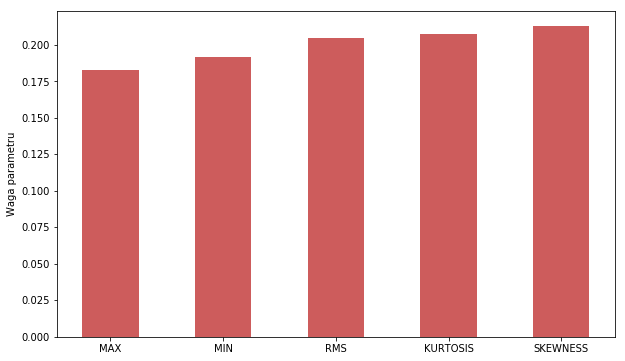

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.5  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru')
ax.set_xticks(ind)
ax.set_xticklabels(allpatients.drop(['Chory'],axis=1).columns)

In [31]:
allpatients.drop(['SKEWNESS','Chory'],axis=1).columns

Index(['MAX', 'MIN', 'RMS', 'KURTOSIS'], dtype='object')